# DEPRESSION CLASSIFICATION MODEL


# Support Vector Machine (SVM) 

Support Vector Machine (SVM) is a supervised machine learning algorithm that is used for classification and regression analysis. SVM is a powerful and versatile algorithm that can be used for various machine learning tasks, but it is most commonly associated with classification. Support Vector Machines (SVMs) can be used in depression classification by analyzing various features or attributes of individuals and determining whether they are likely to have depression or not



#pip install scikit-learn matplotlib


In [223]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [224]:
#loading the dataset
df = pd.read_csv('final.csv')

In [225]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Physical Activity', 'Mood Score',
       'phq_score [PHQ-9]', 'gad_score [GAD-7]'],
      dtype='object')

In [226]:
df.head(10)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62,Male,Bachelor,Unemployed,No,0.170650,7,3,2,7.651882,11,10
1,18,Female,Ph.D.,Unemployed,Yes,0.620737,4,1,1,2.025711,23,14
2,21,Female,Ph.D.,Unemployed,Yes,0.412697,7,9,1,1.300640,0,14
3,21,Male,Master,Employed,No,0.409237,4,4,2,5.607167,27,15
4,57,Female,High School,Unemployed,No,0.145520,6,6,0,1.300060,16,10
5,27,Male,Ph.D.,Student,Yes,0.001865,4,3,1,7.563604,15,9
6,37,Male,Master,Employed,No,0.972120,4,8,0,5.697635,9,4
7,39,Female,High School,Student,No,0.251944,4,2,1,5.229995,4,18
8,54,Male,Master,Employed,No,0.710113,6,9,1,3.932636,13,13
9,41,Male,Bachelor,Unemployed,Yes,0.214553,6,1,4,6.695255,14,0


In [227]:
df.shape

(5001, 12)

In [228]:
#data preprocessing
df[df.isnull().any(axis=1)].head()

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]


In [229]:
df.head(5)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62,Male,Bachelor,Unemployed,No,0.170650,7,3,2,7.651882,11,10
1,18,Female,Ph.D.,Unemployed,Yes,0.620737,4,1,1,2.025711,23,14
2,21,Female,Ph.D.,Unemployed,Yes,0.412697,7,9,1,1.300640,0,14
3,21,Male,Master,Employed,No,0.409237,4,4,2,5.607167,27,15
4,57,Female,High School,Unemployed,No,0.145520,6,6,0,1.300060,16,10


In [230]:
df.shape

(5001, 12)

In [231]:
#creating copy of dataset
clean_data=df.copy()

In [232]:
clean_data.head(5)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62,Male,Bachelor,Unemployed,No,0.170650,7,3,2,7.651882,11,10
1,18,Female,Ph.D.,Unemployed,Yes,0.620737,4,1,1,2.025711,23,14
2,21,Female,Ph.D.,Unemployed,Yes,0.412697,7,9,1,1.300640,0,14
3,21,Male,Master,Employed,No,0.409237,4,4,2,5.607167,27,15
4,57,Female,High School,Unemployed,No,0.145520,6,6,0,1.300060,16,10


In [233]:
clean_data['severe_depression_label'] = ((clean_data['phq_score [PHQ-9]']>=10) & (clean_data['gad_score [GAD-7]']>=7))*1 
clean_data[ 'severe_depression_label'].head()

0    1
1    1
2    0
3    1
4    1
Name: severe_depression_label, dtype: int32

In [234]:
#creating target variable for data modelling
y=clean_data[['severe_depression_label']].copy()
y.head()

,severe_depression_label
0,1
1,1
2,0
3,1
4,1


In [235]:
features=['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score','phq_score [PHQ-9]', 'gad_score [GAD-7]']

In [236]:
X=clean_data[features]
X.head()
X.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score', 'phq_score [PHQ-9]',
       'gad_score [GAD-7]'],
      dtype='object')

#Now we have all independent features in x and dependent features in y

In [237]:
# Perform one-hot encoding for categorical columns
categorical_columns = ['Gender', 'Education Level', 'Employment Status', 'Family History of Depression']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# MODEL TRAINING AND TESTING


In [238]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [239]:
#creating classifier to train data using this and to make the decession tree

In [240]:
#create a SVM classifier and train it with training data
#here using linear SVM. Can change the kernel type depending on dataset
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [241]:
missing_values = X.isnull().sum()
print(missing_values)


Age                              0
Gender                           0
Education Level                  0
Employment Status                0
Family History of Depression     0
Stress Level                     0
Sleep Hours                      0
Number of Social Interactions    0
Mood Score                       0
phq_score [PHQ-9]                0
gad_score [GAD-7]                0
dtype: int64


In [242]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_test_imputed = imputer.fit_transform(X_test)


In [243]:
X_test.dropna(inplace=True)


In [244]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [245]:
# Check the lengths of y_test and y_pred
print(len(y_test))
print(len(y_pred))

1501
1501


In [246]:
## Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       871
           1       0.82      0.83      0.83       630

    accuracy                           0.85      1501
   macro avg       0.85      0.85      0.85      1501
weighted avg       0.85      0.85      0.85      1501



In [247]:
#Recall measures the model's ability to identify all relevant instances in a dataset. It is the ratio of true positive predictions to the total number of actual positive instances. 
#The F1 Score is the harmonic mean of precision and recall.

In [248]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[754 117]
 [105 525]]


In [249]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {accuracy * 100:.2f}%")


Accuracy : 85.21%


ROC Curve: You can plot the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different threshold values.

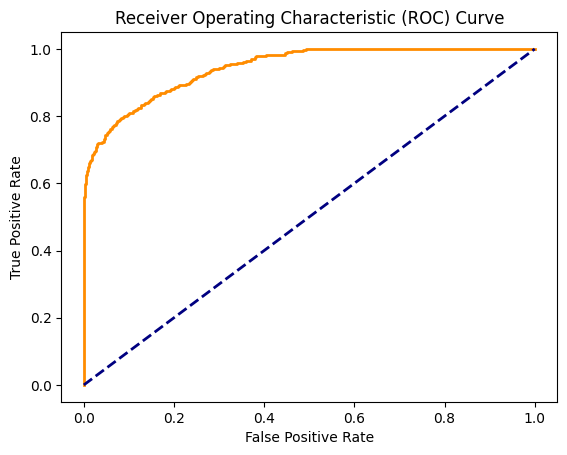

In [250]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#TPR measures the proportion of actual positive cases correctly classified as positive by the model.
#FPR measures the proportion of actual negative cases incorrectly classified as positive by the model.

# SVM DECISION BOUNDARY

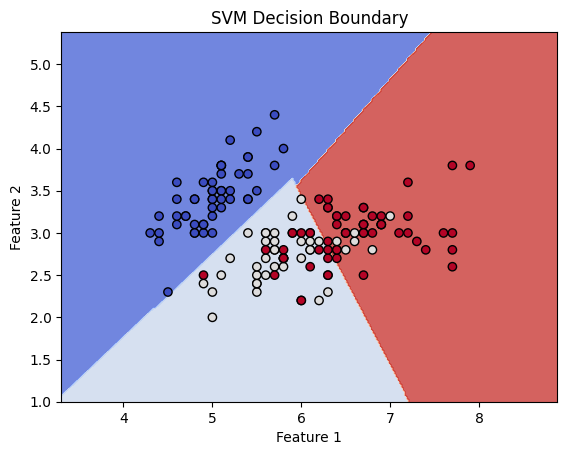

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features \
y = iris.target

svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Create a mesh grid to represent the feature space
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the decision boundary for each point in the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot with the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

plt.show()


This code creates a scatter plot of the dataset points and overlays the decision boundary of the SVM classifier. You can adjust the features you want to visualize by modifying the X variable. 

# SVM classifier Performance metrics

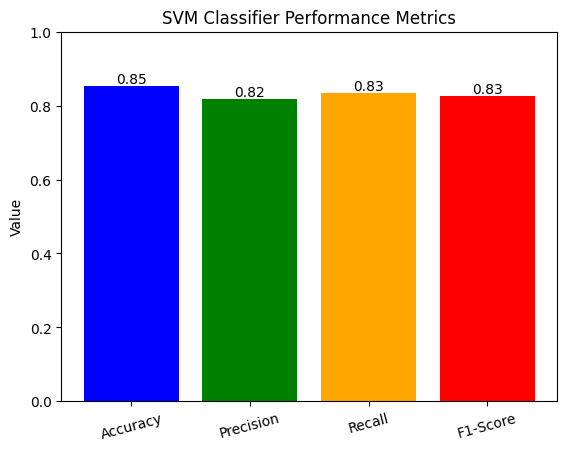

In [252]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=1)
recall = recall_score(y_test, y_pred,zero_division=1)
f1 = f1_score(y_test, y_pred,zero_division=1)

# Create a bar graph to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('SVM Classifier Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 (for accuracy and metrics in [0, 1])

# Adjust the x-axis label rotation for better visibility
plt.xticks(rotation=15)

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()
